# Problem Statement:
 Predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

# Steps to follow:
1. How to get the data
2. PreProcessing
3. Build a Model
4. Compile 
5. Fit 
6. Experimentation

## 1. How to get Data

In [1]:
data_dir = "assets/Plant_images/"


In [2]:
data_dir

'assets/Plant_images/'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f"Image Shape:{img.shape}")

    return img


Image Shape:(256, 256, 3)


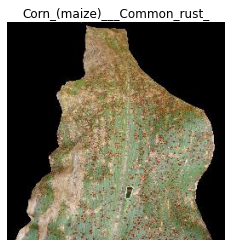

In [4]:
img = view_random_image(data_dir,'Corn_(maize)___Common_rust_')
plt.imshow(img)

## 2. Preprocessing Data:

    * Preprocessing -[`ImageDataGenerator()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
            
    * Data Augmentation -`recall=1/255.`

    * Splitting Data into Training and Test sets -`flow_from_directory()`

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2)

train_data = train_datagen.flow_from_directory(data_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='training')


test_data = train_datagen.flow_from_directory(data_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation')


Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


## 3. Building a Model 

    >  Using Tiny VGG Architecture 
    


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    layers.Conv2D(50,3,input_shape=(224,224,3),activation='relu'),
    layers.Conv2D(40,3,activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(30,3,activation='relu'),
    layers.Conv2D(20, 3, activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(10,3,activation='relu'),
    layers.Conv2D(5, 3, activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),

    layers.Dense(3,activation='softmax')

])



## 4. Compiling a model

In [7]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )


### * Model Summary

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 40)      18040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 40)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 30)      10830     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 20)      5420      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 20)       0         
 2D)                                                    

## 5. Fitting the model

In [9]:
history_1 = model_1.fit(train_data,
            epochs=5,
            validation_data=test_data
            )

Epoch 1/5
23/23 [==============================] - 21s 430ms/step - loss: 0.7852 - accuracy: 0.6139 - val_loss: 0.3574 - val_accuracy: 0.8778
Epoch 2/5
23/23 [==============================] - 5s 231ms/step - loss: 0.3668 - accuracy: 0.8431 - val_loss: 0.3009 - val_accuracy: 0.8722
Epoch 3/5
23/23 [==============================] - 5s 234ms/step - loss: 0.2002 - accuracy: 0.9278 - val_loss: 0.1073 - val_accuracy: 0.9611
Epoch 4/5
23/23 [==============================] - 6s 243ms/step - loss: 0.1182 - accuracy: 0.9694 - val_loss: 0.0865 - val_accuracy: 0.9667
Epoch 5/5
23/23 [==============================] - 5s 229ms/step - loss: 0.0922 - accuracy: 0.9681 - val_loss: 0.1315 - val_accuracy: 0.9444


<AxesSubplot:>

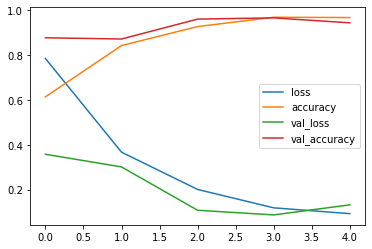

In [10]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

### Custom Loss Function

In [11]:
def custom_hist_fun(history):
    loss =history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = [i for i in range(1,6)]

    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label='Training_Loss')
    plt.plot(epochs,val_loss,label='Validation_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss') 
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label='Training_Accuracy')
    plt.plot(epochs,val_accuracy,label='Validation_Accuracy')  
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy') 
    plt.title('Accuracy Curve')
    plt.legend()
  
    plt.suptitle('Loss vs Accuracy Curve')


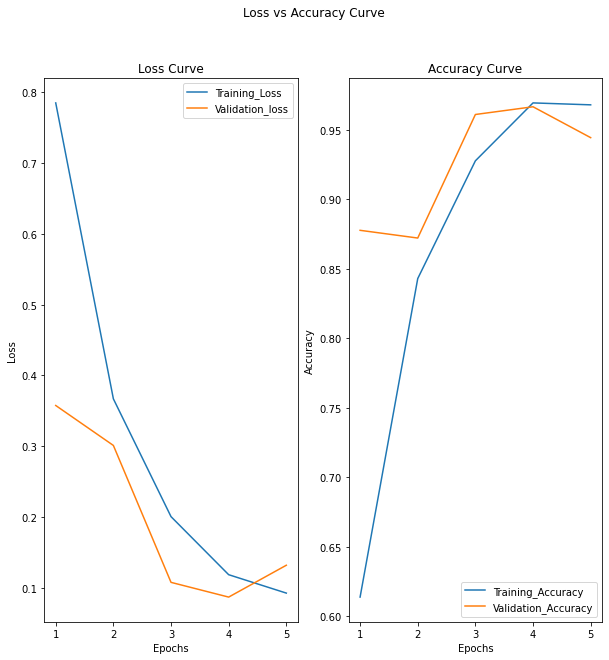

In [12]:
custom_hist_fun(history_1)

## 6. Using Transfer Leraning
 *  Mobilenet_v2_100
 *  Using Efficientnet_B0 


# Mobilenet_v2_100

In [13]:
# functionising our model
def create_model(model_url, num_classes=10, IMG_SIZE=(224, 224)):
  '''Creates a model then returns a model 
      
  Args:
      model_url -> (str) : takes in a model's url from Tensorboard

      num_classes -> (int) : the no.of labels which we are going to predict

      IMG_SIZE -> (tuple) : by default (224,224)

   '''

  feature_extractor = hub.KerasLayer(model_url,
                                     trainable=False,
                                     name='Feature_Extractor',
                                     input_shape=IMG_SIZE+(3,))
  model = Sequential([
      feature_extractor,
      layers.Dense(num_classes,
                   activation='softmax',
                   name='Output_Layer')
  ])

  return model


In [14]:
import datetime
import tensorflow as tf
import tensorflow_hub as hub
def create_callback(dir_name,exp_name):

  log_dir = dir_name+'/'+exp_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard Log Files to: {log_dir}")
  return tensorboard_callback


In [15]:
model_2 = create_model(
    "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5", num_classes=3)


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 1280)             2257984   
 er)                                                             
                                                                 
 Output_Layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
print(f"Weights in Layer1-{len(model_2.layers[0].weights)} \
    Weights in Layer2-{len(model_2.layers[1].weights)}")


Weights in Layer1-260     Weights in Layer2-2


In [18]:
from tensorflow.keras.optimizers import Adam
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        callbacks=[create_callback(
                            dir_name='Tensorhub', exp_name='mobilenet_v2_100_224')]
                        )


Saving TensorBoard Log Files to: Tensorhub/mobilenet_v2_100_224/20220117-230713
Epoch 1/5
23/23 [==============================] - 14s 256ms/step - loss: 0.5276 - accuracy: 0.7875 - val_loss: 0.1500 - val_accuracy: 0.9778
Epoch 2/5
23/23 [==============================] - 4s 175ms/step - loss: 0.0884 - accuracy: 0.9958 - val_loss: 0.0685 - val_accuracy: 0.9944
Epoch 3/5
23/23 [==============================] - 4s 169ms/step - loss: 0.0460 - accuracy: 0.9986 - val_loss: 0.0460 - val_accuracy: 0.9944
Epoch 4/5
23/23 [==============================] - 3s 116ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9944
Epoch 5/5
23/23 [==============================] - 3s 147ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9944


<AxesSubplot:>

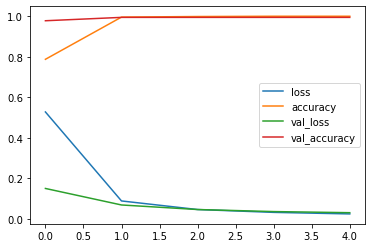

In [19]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

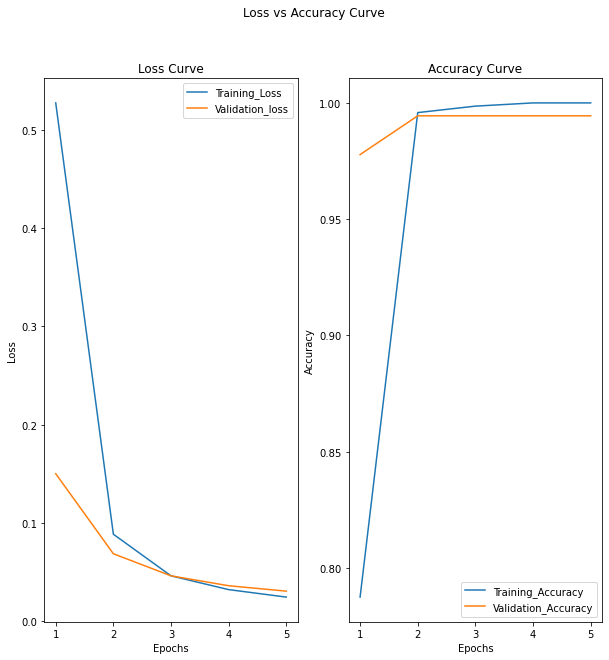

In [20]:
custom_hist_fun(history_2)

# Efficient_B0

In [21]:
model_3 = create_model(
    "https://tfhub.dev/google/efficientnet/b0/feature-vector/1", num_classes=3)


In [22]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,epochs=5,
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks = [create_callback("Tensorhub","Efficient_B0")])

Saving TensorBoard Log Files to: Tensorhub/Efficient_B0/20220117-230748
Epoch 1/5
23/23 [==============================] - 17s 338ms/step - loss: 0.6502 - accuracy: 0.7986 - val_loss: 0.2180 - val_accuracy: 1.0000
Epoch 2/5
23/23 [==============================] - 5s 200ms/step - loss: 0.1457 - accuracy: 0.9889 - val_loss: 0.0896 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 4s 162ms/step - loss: 0.0764 - accuracy: 0.9972 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 3s 144ms/step - loss: 0.0528 - accuracy: 0.9986 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 3s 136ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000


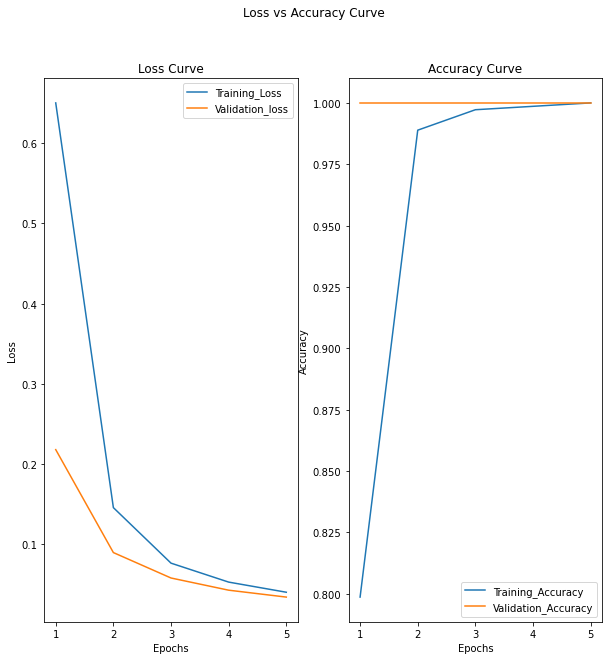

In [23]:
custom_hist_fun(history_3)

Will work on Colab 

In [ ]:
!tensorboard dev upload - -logdir ./tensorflow_hub / \
--name "MobileNet_v2_100 vs Efficientnet_B0" \
--description "Comparing 2 diffrent model architecture" \
--one_shot
